# **Decision Trees**

* Decision Tree is a supervised machine learning algorithm used for both classification and regression which mimics human decision-making by splitting data into branches based on feature values, leading to a decision.

Key concepts:

**1) Structure of a Decision Tree**

- A decision tree consists of:
  - **Root Node**: The starting point of the tree where the first split occurs;
  - **Internal Nodes (Decision Nodes)**: Nodes where decisions are made based on feature values;
  - **Leaf Nodes (Terminal Nodes)**: Nodes representing the final decision (class label or numerical value);

- How a decision tree works:

  1- Select the best feature to split the data;

  2- Create a decision node and split the dataset;

  3- Repeat recursively for each subset until:
  
  - All data points in a node belong to the same class (for classification);
  - A stopping criterion (e.g., max depth, min samples per node) is met.

**2) Splitting Criteria in Decision Trees**

- The decision tree selects the best feature to split based on impurity measure:

A) For classification:
  - **Gini impurity**: measures how often a randomly chosen element would be incorrectly classified:
    
  $ Gini = 1 - \sum p_{i}^{2}$

  where $p_i$ is the probability of class $i$;

  - **Entropy**: measures the uncertainty in the dataset:

  $ Entropy = -\sum p_i \log_2(p_i)$

B) For regression:
  - **Mean Squared Error (MSE)**: measures variance within a node:

  $MSE = \frac{1}{n} \sum (y_i - \bar{y})^2$

  where $\bar{y}$ is the mean target value in a node.

  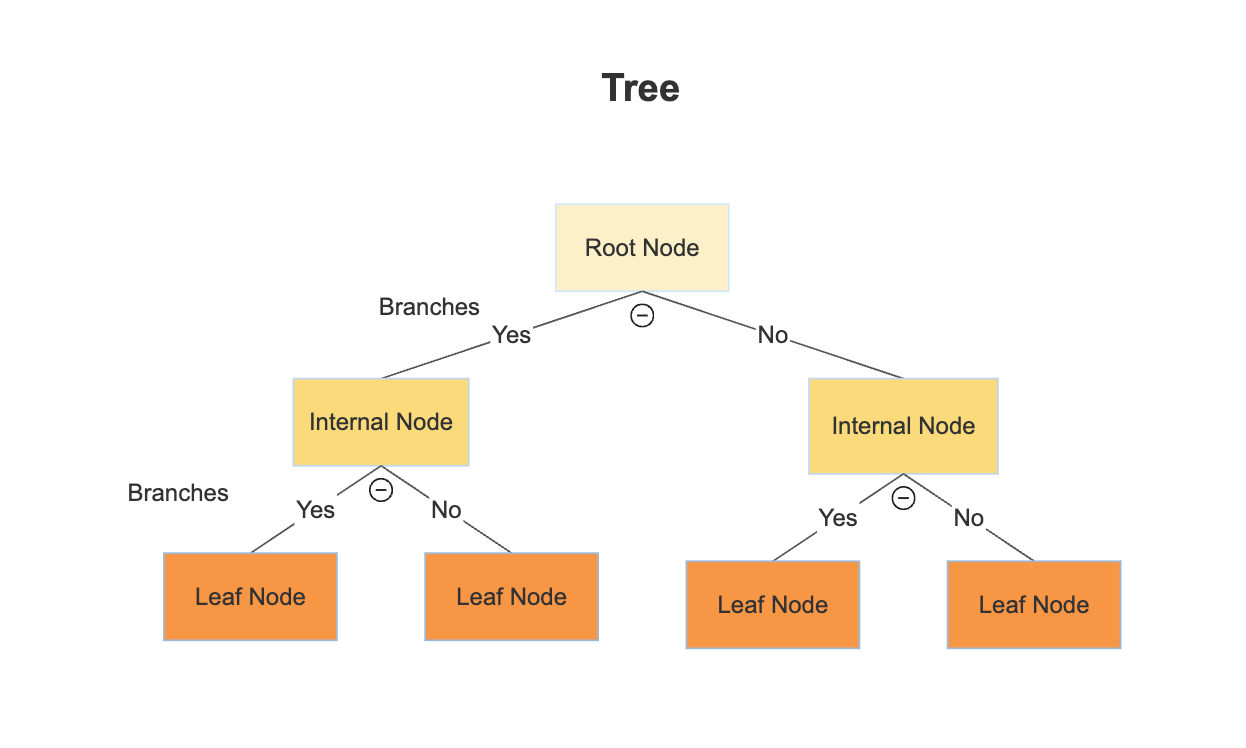
  

# **Implementation of a Decision Tree in Python from scratch**

In [1]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes = len(set(y))  # Number of unique labels
        self.n_features = X.shape[1]  # Number of features
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_labels = np.unique(y)

        # Stop conditions
        if len(unique_labels) == 1 or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]  # Majority class

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            return Counter(y).most_common(1)[0][0]

        # Partition the dataset
        left_idx = X[:, best_feature] <= best_threshold
        right_idx = X[:, best_feature] > best_threshold

        left_subtree = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return {"feature": best_feature, "threshold": best_threshold, "left": left_subtree, "right": right_subtree}

    def _best_split(self, X, y):
        best_gini = float("inf")
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_idx = X[:, feature] <= threshold
                right_idx = X[:, feature] > threshold
                gini = self._gini_impurity(y[left_idx], y[right_idx])

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, y_left, y_right):
        total_samples = len(y_left) + len(y_right)
        gini_left = 1 - sum((np.sum(y_left == c) / len(y_left)) ** 2 for c in np.unique(y_left)) if len(y_left) > 0 else 0
        gini_right = 1 - sum((np.sum(y_right == c) / len(y_right)) ** 2 for c in np.unique(y_right)) if len(y_right) > 0 else 0
        return (len(y_left) / total_samples) * gini_left + (len(y_right) / total_samples) * gini_right

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if isinstance(node, dict):
            if x[node["feature"]] <= node["threshold"]:
                return self._traverse_tree(x, node["left"])
            else:
                return self._traverse_tree(x, node["right"])
        return node

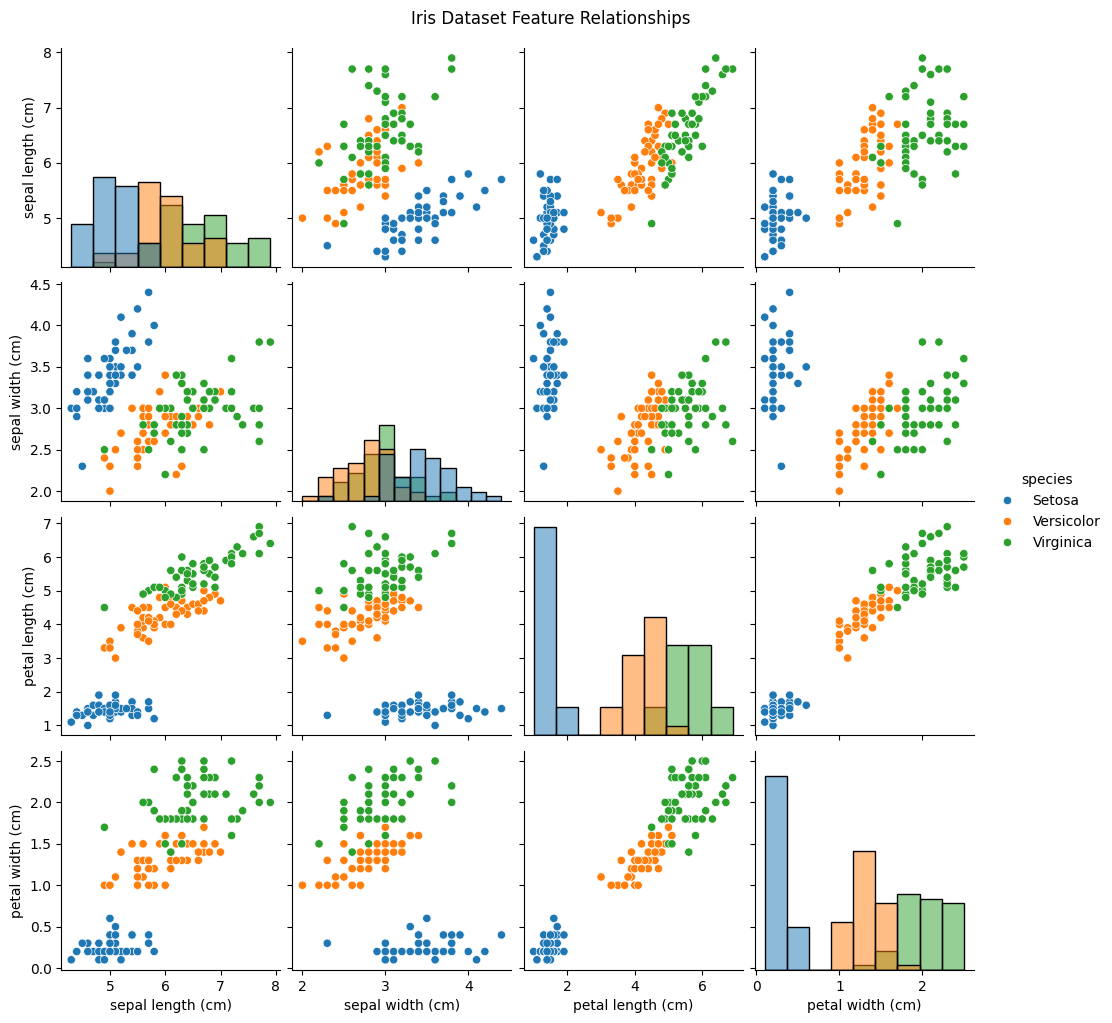

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Iris Dataset Feature Relationships", y=1.02)
plt.show()

**Testing the Decion Tree model**

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Custom Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Custom Decision Tree Accuracy: 0.9666666666666667


**Comparison with scikit-learn's DT**

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)

print("Scikit-Learn Decision Tree Accuracy:", accuracy_score(y_test, y_pred_sklearn))

Scikit-Learn Decision Tree Accuracy: 1.0


**Some visualizations**

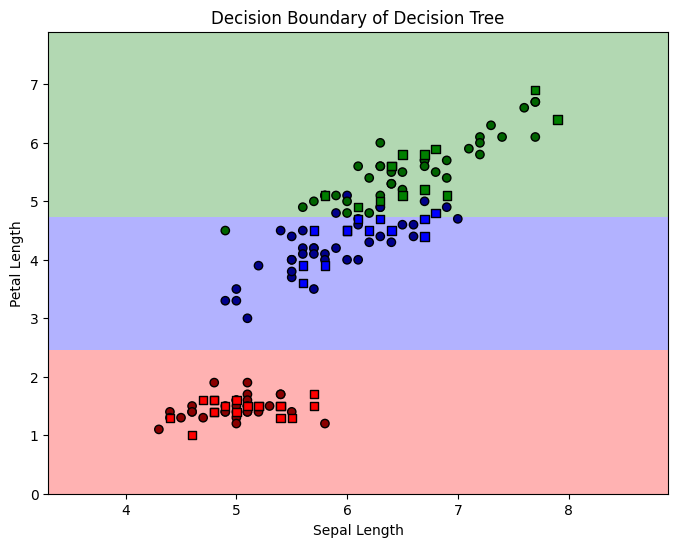

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Select two features for easy visualization
X = iris.data[:, [0, 2]]  # Sepal length & Petal length
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['darkred', 'darkblue', 'darkgreen']))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', cmap=ListedColormap(['red', 'blue', 'green']))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Decision Boundary of Decision Tree")
plt.show()

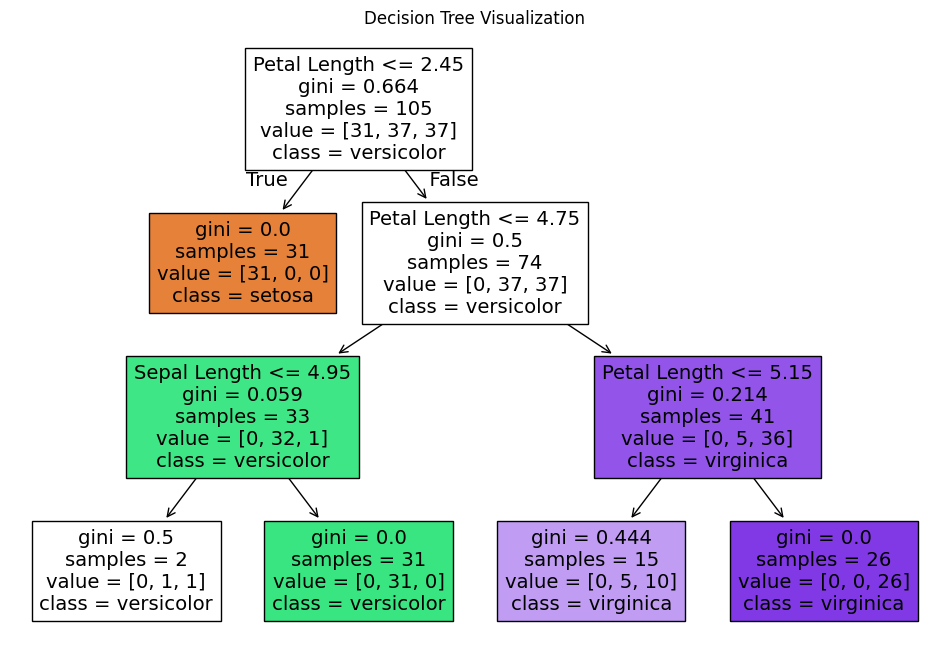

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Sepal Length', 'Petal Length'], class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()